# Close cross Ema - Strategy - Backtesting 

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
from backtesting.backtesting import Backtest, Strategy

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')
# from backtesting._plotting import set_bokeh_output
# set_bokeh_output(notebook=False)
from backtesting import set_bokeh_output
set_bokeh_output(notebook=False)

/home/zuongthao/PycharmProjects/algo-stock/venv/lib/python3.11/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
data = data[data.index > '2020-11-01 00:00:00']

In [5]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2025-02-13 14:15:00,1333.5,1335.4,1333.4,1335.0,5583
2025-02-13 14:20:00,1335.4,1336.5,1334.7,1334.9,5753
2025-02-13 14:25:00,1335.3,1336.8,1334.9,1336.8,4879


In [6]:
def get_signal(r):
    signal = ''
    if r['ema_fast_s1'] < r['ema_low_s1'] and r['ema_fast'] > r['ema_low']:
        signal = 'long'
    elif r['ema_fast_s1'] > r['ema_low_s1'] and r['ema_fast'] < r['ema_low']:
        signal = 'short'
    return signal

In [7]:
def prepare_data(data):
    data['max_in_range'] = data['High'].rolling(10).max()
    data['min_in_range'] = data['Low'].rolling(10).min()
    data["ema_fast"] = ta.ema(data["Close"], length=20)
    data["ema_low"] = ta.ema(data["Close"], length=250)
    data['ema_fast_s1'] = data['ema_fast'].shift(1)
    data['ema_low_s1'] = data['ema_low'].shift(1)
    data['signal'] = data.apply(lambda r: get_signal(r), axis=1)
    return data

In [8]:
prepared_data = prepare_data(data)
prepared_data.dropna(inplace=True)

In [9]:
prepared_data

,Open,High,Low,Close,Volume,max_in_range,min_in_range,ema_fast,ema_low,ema_fast_s1,ema_low_s1,signal
Date,,,,,,,,,,,,
2020-11-06 14:15:00,911.0,912.7,910.5,910.6,5948,912.7,903.5,907.880896,908.796883,907.594675,908.782400,
2020-11-06 14:20:00,910.7,911.2,909.4,910.9,4466,912.7,903.5,908.168430,908.813641,907.880896,908.796883,
2020-11-06 14:25:00,910.5,911.0,908.5,910.0,3602,912.7,904.4,908.342865,908.823094,908.168430,908.813641,
2020-11-06 14:30:00,910.5,910.7,910.5,910.7,78,912.7,906.2,908.567354,908.838049,908.342865,908.823094,
2020-11-06 14:45:00,908.3,908.3,908.3,908.3,4462,912.7,906.7,908.541892,908.833762,908.567354,908.838049,
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-13 14:15:00,1333.5,1335.4,1333.4,1335.0,5583,1338.5,1333.4,1334.824575,1334.211764,1334.806109,1334.205432,
2025-02-13 14:20:00,1335.4,1336.5,1334.7,1334.9,5753,1338.5,1333.4,1334.831758,1334.217248,1334.824575,1334.211764,
2025-02-13 14:25:00,1335.3,1336.8,1334.9,1336.8,4879,1338.5,1333.4,1335.019210,1334.237827,1334.831758,1334.217248,


In [10]:
prepared_data[prepared_data.signal != ''].tail(20)

,Open,High,Low,Close,Volume,max_in_range,min_in_range,ema_fast,ema_low,ema_fast_s1,ema_low_s1,signal
Date,,,,,,,,,,,,
2024-11-01 09:50:00,1337.0,1337.5,1336.5,1337.3,1609,1338.8,1336.4,1339.199980,1339.242278,1339.399978,1339.257879,short
2024-11-06 13:35:00,1331.0,1332.6,1330.1,1331.7,7697,1332.6,1325.9,1328.278631,1328.212243,1327.918487,1328.184229,long
2024-11-08 11:15:00,1329.0,1329.4,1327.8,1328.3,3600,1333.4,1327.8,1332.619107,1332.634868,1333.073749,1332.669686,short
2024-11-21 14:20:00,1281.7,1283.4,1279.0,1283.2,7487,1283.4,1273.8,1275.936494,1275.871321,1275.171914,1275.812456,long
2024-12-04 09:50:00,1308.4,1308.5,1307.0,1307.3,2631,1311.2,1306.0,1309.981890,1310.159916,1310.264194,1310.182887,short
2024-12-05 11:30:00,1313.0,1313.0,1312.8,1312.8,179,1313.0,1305.1,1308.759051,1308.758093,1308.333688,1308.725628,long
2024-12-13 09:20:00,1332.5,1332.7,1331.8,1332.3,2805,1340.9,1330.1,1338.382557,1338.728614,1339.022826,1338.780250,short
2024-12-23 09:55:00,1329.2,1329.3,1329.0,1329.1,900,1331.3,1326.2,1325.399361,1325.168913,1325.009820,1325.137339,long
2024-12-24 09:55:00,1324.1,1324.2,1323.4,1323.6,1288,1327.3,1322.5,1325.814110,1325.955694,1326.047174,1325.974615,short


In [11]:
class MainStrategy(Strategy):
    max_sl = 3.1
    trailing_sl = 5.5
    tp_step = 27
    def init(self):
        self._broker._cash = 1500
        super().init()

    def next(self):
        super().next()
        close_price = self.data.Close[-1]
        if self.position.is_long:
            max_in_range = self.data.max_in_range[-1]
            if close_price < max_in_range - self.trailing_sl:
                self.position.close()
        elif self.position.is_short:
            min_in_range = self.data.min_in_range[-1]
            if close_price > min_in_range + self.trailing_sl:
                self.position.close()
 
        signal = self.data.signal[-1]
        if self.position:
            if signal == 'long' and self.position.is_short:
                self.position.close()
                buy_price = close_price
                sl = buy_price - self.max_sl
                tp = buy_price + self.tp_step
                self.buy(size=1, sl=sl, tp=tp)
            elif signal == 'short' and self.position.is_long:
                sell_price = close_price
                self.position.close()
                sl = sell_price + self.max_sl
                tp = sell_price - self.tp_step
                self.sell(size=1, sl=sl, tp=tp)
        else:
            if signal == 'long':
                buy_price = close_price
                sl = buy_price - self.max_sl
                tp = buy_price + self.tp_step
                self.buy(size=1, sl=sl, tp=tp)
            elif signal == 'short':
                sell_price = close_price
                sl = sell_price + self.max_sl
                tp = sell_price - self.tp_step
                self.sell(size=1, sl=sl, tp=tp)

In [12]:
bt = Backtest(prepared_data, MainStrategy, commission=.0003, exclusive_orders=True)
stats = bt.run()

In [13]:
stats

Start                     2020-11-06 14:15:00
End                       2025-02-13 14:45:00
Duration                   1560 days 00:30:00
Exposure Time [%]                   15.710304
Equity Final [$]                   2064.67652
Equity Peak [$]                    2084.57741
Return [%]                          37.645101
Buy & Hold Return [%]               46.881177
Return (Ann.) [%]                    7.860987
Volatility (Ann.) [%]                4.722798
Sharpe Ratio                         1.664477
Sortino Ratio                        3.797792
Calmar Ratio                          1.66783
Max. Drawdown [%]                   -4.713302
Avg. Drawdown [%]                   -0.317612
Max. Drawdown Duration      247 days 23:00:00
Avg. Drawdown Duration        8 days 07:12:00
# Trades                                  361
Win Rate [%]                         34.34903
Best Trade [%]                       3.309918
Worst Trade [%]                     -3.099416
Avg. Trade [%]                    

In [14]:
stats['_trades'].tail(20)

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
341,-1,50682,50825,1336.79884,1324.9,11.89884,0.008901,2024-11-01 09:55:00,2024-11-06 09:05:00,None,4 days 23:10:00
342,1,50863,50882,1332.09951,1337.9,5.80049,0.004354,2024-11-06 13:40:00,2024-11-07 09:35:00,None,0 days 19:55:00
343,-1,50954,50975,1327.60160,1324.3,3.30160,0.002487,2024-11-08 11:20:00,2024-11-08 14:30:00,None,0 days 03:10:00
344,1,51433,51477,1283.48493,1294.8,11.31507,0.008816,2024-11-21 14:25:00,2024-11-22 13:50:00,None,0 days 23:25:00
345,-1,51855,51866,1307.00778,1308.5,-1.49222,-0.001142,2024-12-04 09:55:00,2024-12-04 10:50:00,None,0 days 00:55:00
346,1,51926,51937,1313.59396,1339.8,26.20604,0.019950,2024-12-05 13:00:00,2024-12-05 13:55:00,None,0 days 00:55:00
347,-1,52206,52209,1331.90031,1335.4,-3.49969,-0.002628,2024-12-13 09:25:00,2024-12-13 09:40:00,None,0 days 00:15:00
348,1,52517,52556,1329.89885,1325.5,-4.39885,-0.003308,2024-12-23 10:00:00,2024-12-24 09:00:00,None,0 days 23:00:00
349,-1,52568,52600,1323.00298,1326.7,-3.69702,-0.002794,2024-12-24 10:00:00,2024-12-24 14:05:00,None,0 days 04:05:00
350,1,52608,52641,1333.09981,1349.4,16.30019,0.012227,2024-12-25 09:05:00,2024-12-25 13:15:00,None,0 days 04:10:00


In [15]:
stats['_trades']['PnL'].min()

-39.885949999999866

In [16]:
trades = stats['_trades']

In [17]:
trades[trades.PnL < -3.1]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
1,-1,153,154,912.32622,915.7,-3.37378,-0.003698,2020-11-11 14:15:00,2020-11-11 14:20:00,None,0 days 00:05:00
5,-1,829,851,962.71110,965.9,-3.18890,-0.003312,2020-12-01 09:50:00,2020-12-01 13:05:00,None,0 days 03:15:00
7,-1,1703,1706,1032.69010,1035.8,-3.10990,-0.003011,2020-12-24 10:25:00,2020-12-24 10:40:00,None,0 days 00:15:00
8,1,1761,1762,1049.71482,1046.3,-3.41482,-0.003253,2020-12-25 11:00:00,2020-12-25 11:05:00,None,0 days 00:05:00
12,1,3100,3102,1090.32700,1086.9,-3.42700,-0.003143,2021-02-02 13:45:00,2021-02-02 13:55:00,None,0 days 00:10:00
...,...,...,...,...,...,...,...,...,...,...,...
352,1,53373,53380,1308.39240,1304.9,-3.49240,-0.002669,2025-01-16 09:40:00,2025-01-16 10:15:00,None,0 days 00:35:00
353,-1,53399,53416,1300.20982,1308.9,-8.69018,-0.006684,2025-01-16 13:15:00,2025-01-17 09:00:00,None,0 days 19:45:00
357,-1,53988,53991,1327.50163,1331.0,-3.49837,-0.002635,2025-02-10 09:55:00,2025-02-10 10:10:00,None,0 days 00:15:00
358,1,54082,54120,1341.10221,1337.7,-3.40221,-0.002537,2025-02-12 09:15:00,2025-02-12 13:50:00,None,0 days 04:35:00


In [18]:
trades[trades.PnL < -3.1]['PnL'].sum()

-715.3217999999808

In [19]:
len(trades[trades.PnL < -3.1]) * -3.1

-542.5

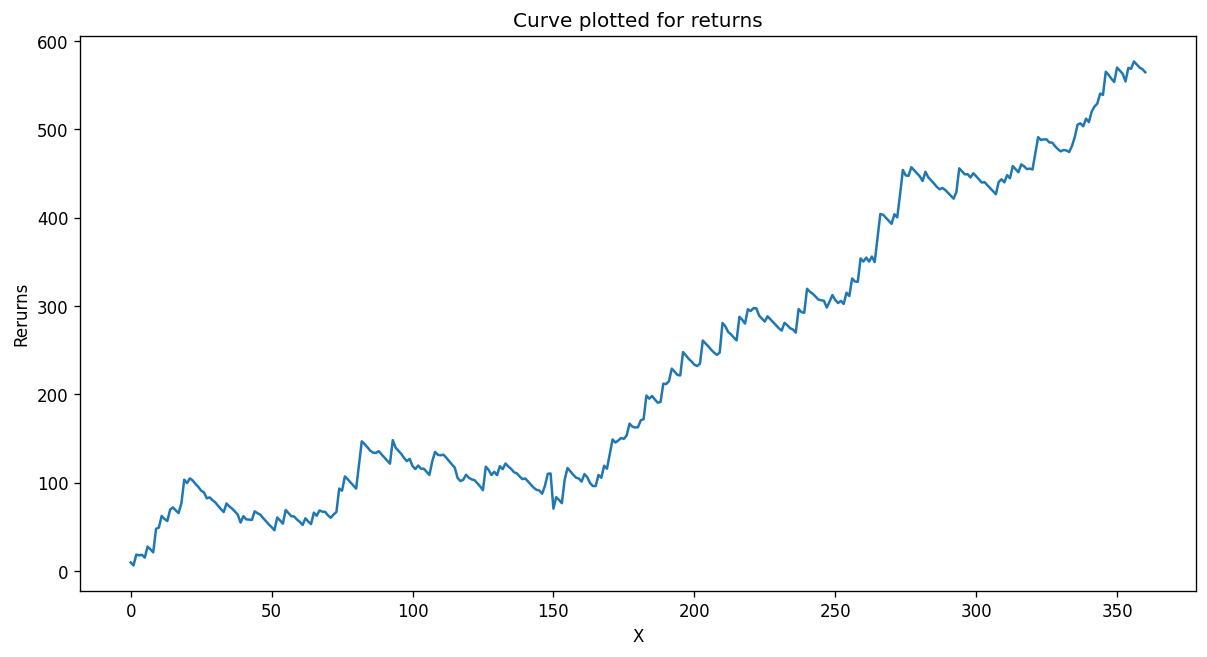

In [20]:
copy_trades = trades.copy()
copy_trades['cum_sum'] = copy_trades['PnL'].cumsum()
X = np.array(range(0, len(copy_trades['cum_sum'])))
Y = copy_trades['cum_sum']
# Plotting the Graph
plt.plot(X, Y)
plt.title("Curve plotted for returns")
plt.xlabel("X")
plt.ylabel("Rerurns")
plt.show()